   
#OSCII CODED
#MOVE IT NEEDED   launch it


## Setup

必要なライブラリをインポートして、初期化を行います。

Import the required libraries and initialize them:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ros_numpy
import rospy
import tf
from gazebo_ros import gazebo_interface
from sensor_msgs.msg import LaserScan, PointCloud2
from geometry_msgs.msg import Pose, Quaternion
import sys
import time

from utils_notebooks import *
import cv2
import os
import xmltodict




In [2]:
import moveit_commander
import moveit_msgs.msg
head = moveit_commander.MoveGroupCommander('head')

In [3]:


## THIS PATH MUST BE SET BY USER () 


#_path_model = "/home/oscar/Codes/ycb_ws/src/robot_object_views/robotobject/models"   Tenshi Version

_path_model = "/home/oscar/Codes/catkin_mio_ws/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 
#_path_model = "/home/roboworks/Codes/catkin_mio/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 


objs=os.listdir(_path_model)
objs.sort()
print (objs)

['person_standing', 'training_floor', 'training_wall', 'trofast', 'wrc_bin_black', 'wrc_bin_green', 'wrc_bookshelf', 'wrc_container_a', 'wrc_container_b', 'wrc_frame', 'wrc_ground_plane', 'wrc_long_table', 'wrc_stair_like_drawer', 'wrc_tall_table', 'wrc_tray', 'ycb_002_master_chef_can', 'ycb_003_cracker_box', 'ycb_004_sugar_box', 'ycb_005_tomato_soup_can', 'ycb_006_mustard_bottle', 'ycb_007_tuna_fish_can', 'ycb_008_pudding_box', 'ycb_009_gelatin_box', 'ycb_010_potted_meat_can', 'ycb_011_banana', 'ycb_012_strawberry', 'ycb_013_apple', 'ycb_014_lemon', 'ycb_015_peach', 'ycb_016_pear', 'ycb_017_orange', 'ycb_018_plum', 'ycb_019_pitcher_base', 'ycb_021_bleach_cleanser', 'ycb_022_windex_bottle', 'ycb_024_bowl', 'ycb_025_mug', 'ycb_026_sponge', 'ycb_027_skillet', 'ycb_028_skillet_lid', 'ycb_029_plate', 'ycb_030_fork', 'ycb_031_spoon', 'ycb_032_knife', 'ycb_033_spatula', 'ycb_035_power_drill', 'ycb_036_wood_block', 'ycb_037_scissors', 'ycb_038_padlock', 'ycb_040_large_marker', 'ycb_042_adjust

In [4]:
#AGAIN THIS PATH MUST BE SET ( IT IS LOCATED IN NOTEBOOK UTILS FILE utils_notebooks.py)

rvizを起動します．ロボットモデル、カメラ映像、ポイントクラウドが表示されています。

In [5]:
#Initialize  Ros Node
rospy.init_node("recognition")


In [6]:
#create a RGBD() object to read xtion
rgbd = RGBD()

In [7]:
#Create a tf listener to read tf tree ( shockingly)
listener = tf.TransformListener()
rospy.sleep(.5)

Launch RViz. The robot model, camera image, and point cloud are displayed:

In [8]:
def gazebo_2_world(x,y):

    x_world= x+2.1
    y_world= -(y-1.2)
    return (x_world,y_world)

def world_2_gazebo(y_world , x_world):

    x= ( x_world - 2.1)
    y= (-y_world + 1.2) 
    return (x , y)

In [9]:
#Get pose of the xtion w.r.t map frame 
#( odom , or hsrb base footprint might be other 
#useful reference frames)


trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler

([0.020063391952104742, 0.020897078054737655, 0.9919251384732191],
 (-4.896527625046475e-12, -0.001895661393017001, -0.013582422966984512))

In [10]:
#moveit
#MOVE IT MUST BE RUNNING. DECLARE A HEAD POSE
head_val=head.get_current_joint_values()
head_val[0]=np.deg2rad(80)
head_val[1]=np.deg2rad(-20)
#WATCH OUT FOR JOINTS LIMITS (exorcist joke)

In [11]:
#plan and execute target pose
head.set_joint_value_target(head_val)
head.go()

True

In [12]:
#Get pose of the xtion w.r.t map frame 

trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler


([0.07533607225509263, 0.020086683011219585, 1.0064501993187778],
 (-4.896583577192694e-12, 0.3485634629722625, 1.381612265179069))

In [13]:
model_name = 'training_wall'#objs[-1]
print model_name

training_wall


In [14]:

deg=0
D_to_cam= 2 


x_gaz,y_gaz=world_2_gazebo(1,1)
z_gaz=.001
spawn_object(model_name+'1', model_name, x_gaz,  y_gaz,  z_gaz,0.0,0.0,1.57)
spawn_object(model_name+'2', model_name, x_gaz+.5,  y_gaz,  z_gaz,0.0,0.5 * np.pi,0)


x_gaz,y_gaz=world_2_gazebo(+trans[0]+ D_to_cam * np.cos(euler[2]), +  trans[1]+ D_to_cam * np.sin(euler[2]))
z_gaz= trans[2]- D_to_cam*np.sin(euler[1])

spawn_object(model_name+'3', model_name, x_gaz,  y_gaz-1.82,  z_gaz,1.57,0,0)


[INFO] [1617744827.333704, 289.444000]: Spawn: training_wall
[INFO] [1617744827.338631, 289.444000]: Spawn: [0.         0.70682518 0.         0.70738827]
[INFO] [1617744827.347017, 289.445000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1617744827.364097, 289.446000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1617744827.742977, 289.485000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1617744827.744658, 289.485000]: Spawn: training_wall
[INFO] [1617744827.749849, 289.485000]: Spawn: [0.70710678 0.         0.         0.70710678]
[INFO] [1617744827.751303, 289.485000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1617744827.775228, 289.487000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1617744828.020530, 289.502000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1617744828.050073, 289.502000]: Spawn: training_wall
[INFO] [1617744828.051738, 289.502000]: Spawn: [0.         0.         0.70682518 0.70738827]
[INFO] [1617744828.052

In [15]:
## USEFULL FOR ADJUSTMENTS
#delete_object(model_name+'1')
#delete_object(model_name+'2')
#delete_object(model_name+'3')

In [16]:
model_name = objs[-1]
print model_name

ycb_077_rubiks_cube


In [17]:
#USE TRANSFORM TREE TF TO SPAWN A STATIC MODEL
# D_to_cam  METERS AWAY FROM THE XTION ON THE dIRECTION OF ITS FOCAL POINT


#x_gaz,y_gaz=world_2_gazebo(1.15,0.02)
deg=0
D_to_cam= .31 
x_gaz,y_gaz=world_2_gazebo(+trans[0]+ D_to_cam * np.cos(euler[2]), +  trans[1]+ D_to_cam * np.sin(euler[2]))
z_gaz= trans[2]- D_to_cam*np.sin(euler[1])
spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, 1.5* np.pi , 0,euler[2])
#spawn_object(model_name+'1', model_name, x_gaz,  y_gaz, z_gaz ,-.5*np.pi , .5*np.pi, euler[2])     #spawn_object(model_name+'1', model_name, x_gaz,  y_gaz, z_gaz,0.5*np.pi , 0 ,euler[2])
#spawn_object(model_name+'2', model_name, x_gaz,  y_gaz,  z_gaz, np.pi,0 ,euler[2])
#spawn_object(model_name+'3', model_name, x_gaz,  y_gaz,  z_gaz, 1.5*np.pi ,0,euler[2]+np.pi)

[INFO] [1617744828.377625, 289.513000]: Spawn: ycb_077_rubiks_cube
[INFO] [1617744828.380382, 289.513000]: Spawn: [-0.45053924 -0.45053924  0.54499027 -0.54499027]
[INFO] [1617744828.383150, 289.513000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1617744828.412335, 289.516000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1617744828.646146, 289.523000]: Spawn status: SpawnModel: Successfully spawned entity


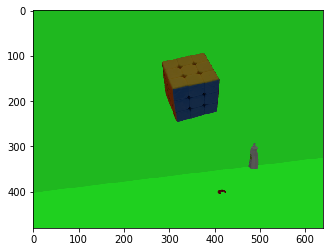

In [18]:
#GET AND SHOW IMAGE
rospy.sleep(.5)
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)
#delete_object(model_name)


In [19]:
#delete_object(model_name)
#delete_object(model_name+str(1))
#delete_object(model_name+str(2))
#delete_object(model_name+str(3))


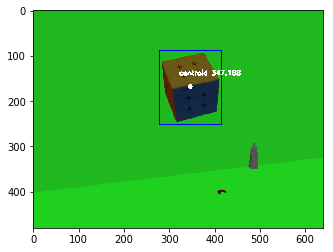

In [20]:
close_enough= False
goal_cX=cv2_img.shape[1]
goal_cY=cv2_img.shape[0]
cv2_img = rgbd.get_image()
img=cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
#img= np.copy(cv2_img)
low= np.array([0,100,0])
high= np.array([100,200,100])
mask = cv2.inRange(cv2_img, low, high)
mask_buena= cv2.morphologyEx(mask,cv2.MORPH_ERODE,np.ones((9,9),np.uint8))
masked_image = np.copy(img)
masked_image[mask_buena != 0] = [0, 0, 0]

#
### FIND OBJECTS ( CONTOURS FINDING IN MASKED IMAGE)

ret,thresh = cv2.threshold(mask_buena,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=find_2nd_biggest_contour_ix(contours)
boundRect = cv2.boundingRect(contours[find_2nd_biggest_contour_ix(contours)])#contours_poly[i])
img=cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (255,0,0), 2)
##DRAW BOUNDIG RECT AROUND SECOND BIIGGEST CONTOUR ( WHY SECOND PLEASE THINK ABOUT IT, and EXPERIMENT)
#img_roi=img[y:y+h,x:x+w,:]
#img_resized=cv2.resize(img_roi,(img_width,img_height))
ret,thresh = cv2.threshold(mask_buena,127,255,0)
c=contours[find_2nd_biggest_contour_ix(contours)]
# calculate moments for each contour
M = cv2.moments(c)
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid "+str(cX)+','+str(cY)    ,    (cX - 25, cY - 25)   ,cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
cv2_img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#cv2.imshow('press key to quit',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(cv2_img)

In [21]:
print (cX,cY,boundRect)


(347, 168, (279, 89, 137, 162))


In [22]:
### this means 40 px is around .06m   distance to focal point =1
# 50 px  ---- adj_x
# 45px   ----- 0.06m


In [23]:
#delete_object('training_wall')
delete_object('training_wall'+str(1))
delete_object('training_wall'+str(2))
delete_object('training_wall'+str(3))


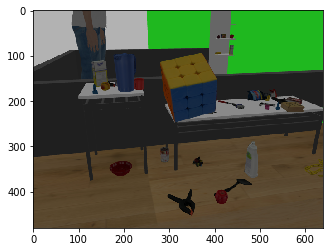

In [24]:
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)


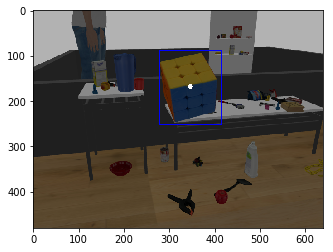

In [25]:
cv2_img = rgbd.get_image()

img=cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

#img=cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

img=cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), (255,0,0), 2)
cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)



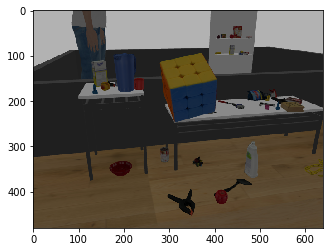

In [26]:
obj_name=model_name
contador=0
save_xml=True
path= '/home/oscar/Desktop/markov_vids_and_crap/'
#cv2.imwrite(obj_name+'pad_digit_num(contador,4)+'.png'')
cv2.imwrite(path+obj_name+pad_digit_num(contador,4)+'.png',cv2_img)
plt.imshow(cv2_img)

In [27]:

####  MUST READ TENSOR FLOW OBJECT DETECTION API
####  IN THERE YOU WILL FIND A TUTORIAL FOR TRAINING YUR OWN NETWORK
###   https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/    ( GOOGLE SEARCH MIGHT BE HARD SO HERE IS THE LINK) 
###   OR TO USE THE MODELS IN THE TENSORFLOW MODEL GARDEN AND MODEL ZOO
###   Once you are familiar you will note that an  anotation xml  is needed for each pic
###   This time we wont make mr edd happy with videos, we will have a directory structure as shown on tutorial
###    You will find an XML sample file 0000.xml on the repo. 

In [28]:

#PATH TO CREATE TRAINING IMAGES STRUCTURE ( LOOK TUTORIAL)

with open('0000.xml') as fd:
    doc = xmltodict.parse(fd.read())
    doc['annotation']['size']['width']=cv2_img.shape[1]
    doc['annotation']['size']['height']=cv2_img.shape[0]
    doc['annotation']['object']['name']=obj_name
    doc['annotation']['filename']=obj_name+pad_digit_num(contador,4)+'.png'
    doc['annotation']['path']=path+obj_name
    doc['annotation']['object']['bndbox']['xmin']=boundRect[0]
    doc['annotation']['object']['bndbox']['xmax']=boundRect[0]+boundRect[2]
    doc['annotation']['object']['bndbox']['ymin']=boundRect[1]
    doc['annotation']['object']['bndbox']['ymax']=boundRect[1]+boundRect[3]
    if save_xml:
        with open(path+obj_name+'/'+obj_name+pad_digit_num(contador,4)+'.xml', 'w') as result_file:
            result_file.write(xmltodict.unparse(doc))

    contador+=1
    

In [29]:
delete_object(model_name)